# Maven Airlines Case Study for Passenger Satisfaction

## Introduction : 

For this challenge, you'll be assuming the role of Senior Data Analyst for Maven Airlines, a US-based airline headquartered in Boston, Massachusetts. The latest passenger survey results just came in and it looks like the satisfaction rate dipped under 50% for the first time ever. The leadership team needs to take action fast, so they've brought you in to analyze the data and find the key areas to focus on for getting back on track.

Your task is to recommend a data-driven strategy for increasing Maven Airlines' satisfaction rate, and present it in the form of a single page report or dashboard.

## 1 - Specifications

There I will be using the Mavenanalytics data set, as it is made public I assume that everybody is authorized to work on it and I also assume that there is no issue with bias or credibility of this datas.

## 2 - Preliminary questions 

I wanted to raise as many questions as possible covering all the different criterias of the data set. Basically I will proceed step by step :<br>

   - <b>What is the ratio of satisfied passengers to dissatisfied passengers?</b> This one is basic although it remains essential for further analysis <br><br>
    
   - <b>What is the satisfaction rate by gender stats?</b> By differentiating the gender I might encounter useful results and eventually consider it as a source of improvement for the future recommendations.<br><br>
    
   - <b>What is the satisfaction rate by customer type of travel and class ?</b> There I will be splitting my results and I could later on focus on what type of class efforts should be made and what kind of travel are most likely required to be worked on<br><br>
   - <b>What is the satisfaction rate by flight distance ?</b> There I am going to categorize the travel under 3 categories and use it to increase the granularity of my analysis<br><br>
   - Finally, I will also study each features by type of passengers in order to retrieve the factors that affects positively or negatively the customer satisfaction.

## 3 - Processing the data

The data set file provided by MavenAnalytics is an excel CSV file. I had several option to exploit this data set, but in this case I am going to use Python and the famous libraries Pandas,Numpy and Seaborn to visualize all my data. Here my objective is not to provide a one page sumary of all the results but rather a paper which will tackle all the questions I have raised and bring proper explanations and solution as a conclusion. 

First I will import all the required libraries and I will also convert the CSV file as a dataset. 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('airline_passenger_satisfaction.csv')

Let's inspect quickly the df to get a first glance and eventually spot some issues to correct it quickly.

In [3]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


First thing, I am going to lowercase and formate the column's headers.

In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')

Now I am looking for Null or missing value in the entire dataset.

In [5]:
df.isnull().sum()

id                                          0
gender                                      0
age                                         0
customer_type                               0
type_of_travel                              0
class                                       0
flight_distance                             0
departure_delay                             0
arrival_delay                             393
departure_and_arrival_time_convenience      0
ease_of_online_booking                      0
check-in_service                            0
online_boarding                             0
gate_location                               0
on-board_service                            0
seat_comfort                                0
leg_room_service                            0
cleanliness                                 0
food_and_drink                              0
in-flight_service                           0
in-flight_wifi_service                      0
in-flight_entertainment           

There are missing values in the 'arrival_delay' column. Thus I am going to check for these missing values and eventually replace them by 0 as I assume that means there were no delay.

In [6]:
df.loc[df.arrival_delay.isnull() == True,'arrival_delay'] = 0 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   id                                      129880 non-null  int64  
 1   gender                                  129880 non-null  object 
 2   age                                     129880 non-null  int64  
 3   customer_type                           129880 non-null  object 
 4   type_of_travel                          129880 non-null  object 
 5   class                                   129880 non-null  object 
 6   flight_distance                         129880 non-null  int64  
 7   departure_delay                         129880 non-null  int64  
 8   arrival_delay                           129880 non-null  float64
 9   departure_and_arrival_time_convenience  129880 non-null  int64  
 10  ease_of_online_booking                  1298

Alright so far it seems there is no more missing values, the data seems coherent. I am going to proceed to specific changes, first I am going to create age categories as it's gonna be useful later on. Second, I also create flight distance range column.

I purposely chose to create arbitrary age range to avoid any distribution problem.

In [8]:
age_category = [0,10,20,30,40,50,60,70]

In [9]:
df['age_category']=pd.cut(df.age,age_category)

In [10]:
flight_category = [0,1000,3000,5000]
flight_category_labels = ['Short Haul','Medium Haul','Long Haul']

In [11]:
df['flight_category'] = pd.cut(df.flight_distance,flight_category, labels=flight_category_labels)

In [12]:
df.head()

,id,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay,arrival_delay,departure_and_arrival_time_convenience,...,leg_room_service,cleanliness,food_and_drink,in-flight_service,in-flight_wifi_service,in-flight_entertainment,baggage_handling,satisfaction,age_category,flight_category
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,2,5,5,5,3,5,5,Neutral or Dissatisfied,"(40, 50]",Short Haul
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,5,3,5,2,5,5,Satisfied,"(30, 40]",Short Haul
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,5,3,4,3,3,Satisfied,"(40, 50]",Short Haul
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,4,4,5,2,5,5,Satisfied,"(40, 50]",Medium Haul
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,5,4,3,3,3,3,Satisfied,"(40, 50]",Long Haul


Now the dataset is perfectly ready to start my analysis and further then the visualization.

## 4 - Analyzing the Data

### Satisfaction By Gender

First, I am going to study the distribution of the gender across the passengers.

In [13]:
(df[df.gender=='Female'].count()[0] / df.count()[0] )*100

50.738373883584856

The gender distribution is quite equal, indeed <b>50,73%</b> of the customer are women and <b>49.27%</b> are men. Now let's check what about customer satisfaction according to the genre, it will give us first insights about satisfaction.

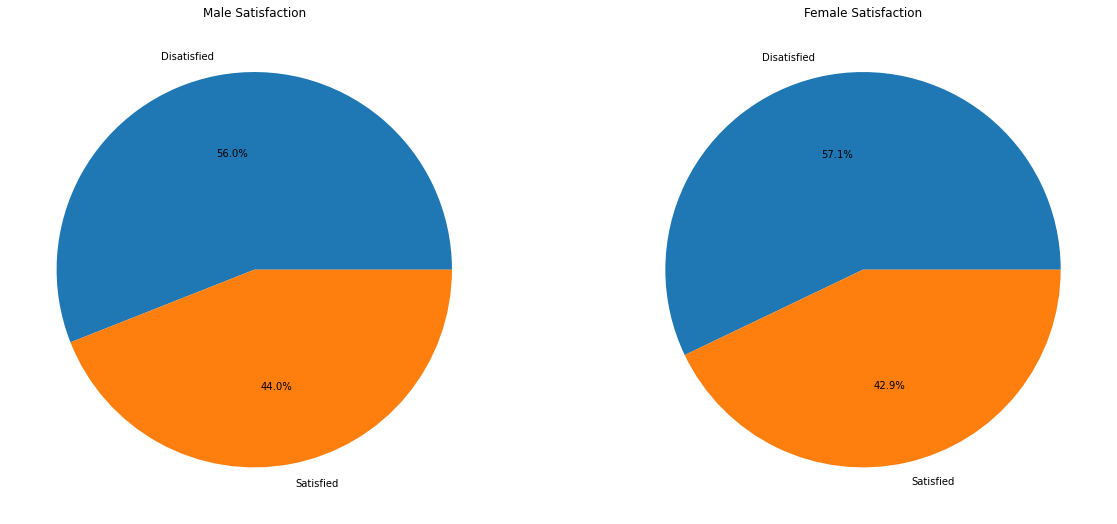

In [79]:
fig = plt.figure(figsize = (20,20))
i=1
for characteristic in df.gender.unique():
    plt.subplot(2,2,i)
    ax = plt.pie(df.loc[df.gender==characteristic].groupby('satisfaction').size(),
                 labels = ['Disatisfied','Satisfied'],
                autopct='%1.1f%%' )
    plt.title(characteristic + ' Satisfaction',loc='center')
    i += 1
    

Basically, there is no big difference among the gender, <b>they are both mainly globally unsatisfied. </b>

In [15]:
df.head()

,id,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay,arrival_delay,departure_and_arrival_time_convenience,...,leg_room_service,cleanliness,food_and_drink,in-flight_service,in-flight_wifi_service,in-flight_entertainment,baggage_handling,satisfaction,age_category,flight_category
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,2,5,5,5,3,5,5,Neutral or Dissatisfied,"(40, 50]",Short Haul
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,5,3,5,2,5,5,Satisfied,"(30, 40]",Short Haul
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,5,3,4,3,3,Satisfied,"(40, 50]",Short Haul
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,4,4,5,2,5,5,Satisfied,"(40, 50]",Medium Haul
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,5,4,3,3,3,3,Satisfied,"(40, 50]",Long Haul


I need to get all the features name to visualize each one of them based on the gender, the idea is to display each score for each features for each gender. Likewise, we can verify if something is wrong according to one or another gender, the potential differences, and get insights about the features the company must work on.

In [16]:
features = [name for name in df.loc[:,'departure_and_arrival_time_convenience':'baggage_handling'].columns]

In [17]:
features

['departure_and_arrival_time_convenience',
 'ease_of_online_booking',
 'check-in_service',
 'online_boarding',
 'gate_location',
 'on-board_service',
 'seat_comfort',
 'leg_room_service',
 'cleanliness',
 'food_and_drink',
 'in-flight_service',
 'in-flight_wifi_service',
 'in-flight_entertainment',
 'baggage_handling']

In [18]:
satisfaction_by_gender = round(df.groupby('gender')[features].mean(),2)

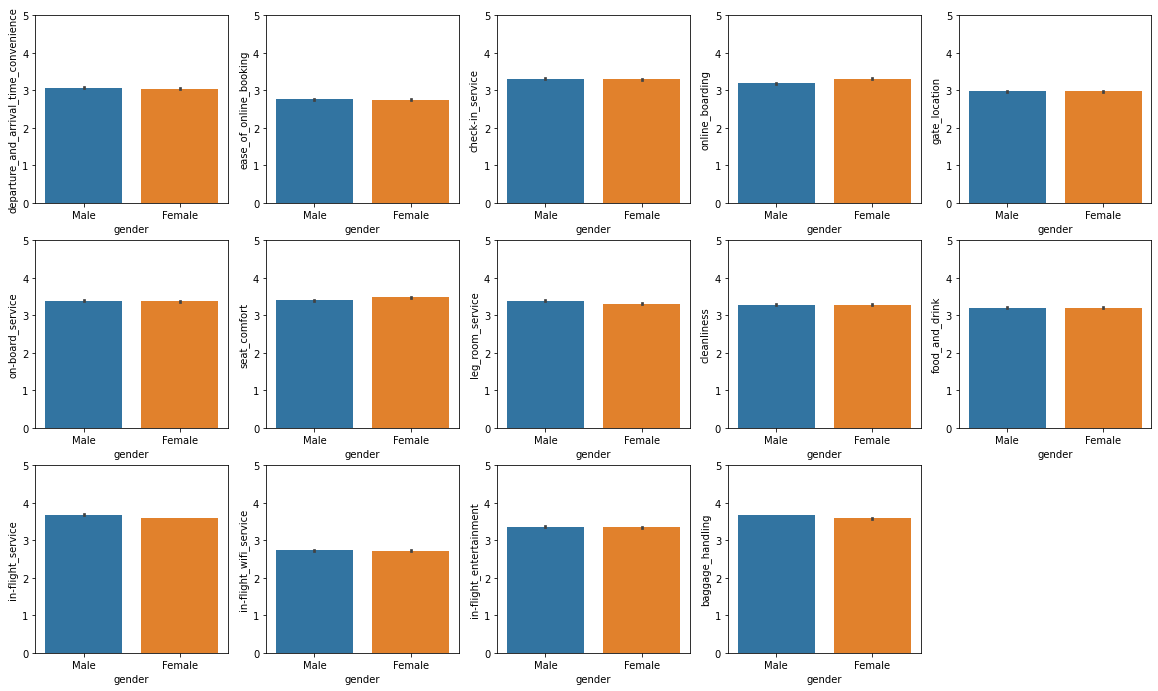

In [19]:
fig = plt.figure(figsize = (20,20))

i=1
for feature in features: 
    plt.subplot(5,5,i)
    plt.ylim(0,5)
    ax = sns.barplot(data = df , x = df.gender , y =df[feature])
    i +=1
plt.show()

Here we can seen that there is no huge difference between both gender. We have some several interesting insights : <br>
 - The most unstasfying feature is the <b>wifi service</b> <br>
 - The <b>gate location</b> and the <b>online booking</b> are also the worst graded features<br>
 - In <b>flight service</b> and <b>bagage handling</b> are quite satisfying<br>

### Satisfaction by Age Category

#### Satisfaction for each features by Age Category

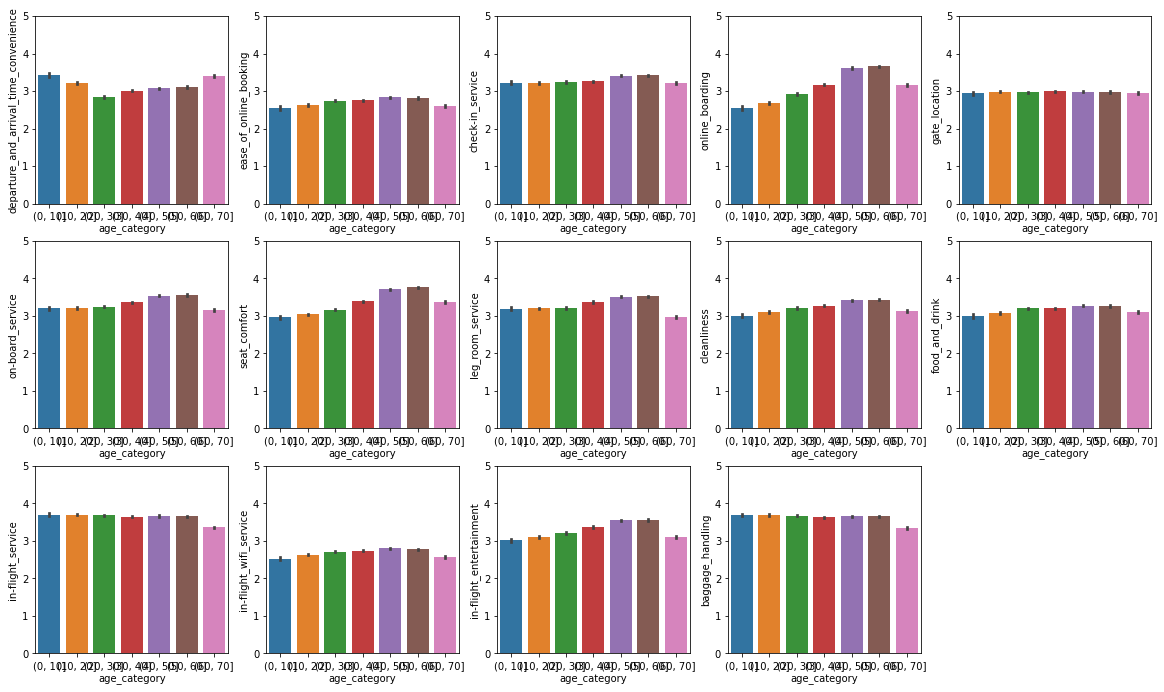

In [20]:
fig = plt.figure(figsize = (20,20))
i=1
for feature in features: 
    plt.subplot(5,5,i)
    plt.ylim(0,5)
    ax = sns.barplot(data = df , x = df.age_category , y =df[feature])
    i +=1

#### Global satisfaction by Age Category

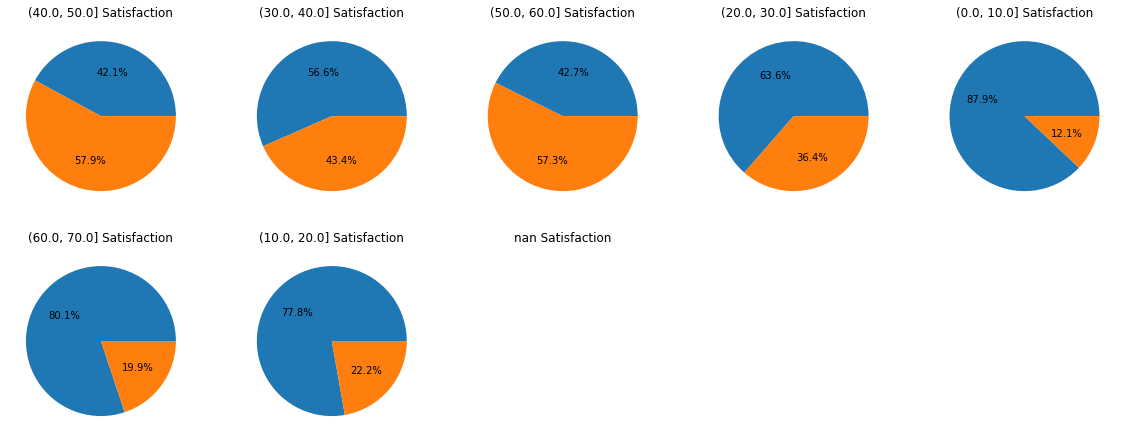

In [86]:
fig = plt.figure(figsize = (20,20))
i=1
for characteristic in df['age_category'].unique():
    plt.subplot(5,5,i)
    ax = plt.pie(df.loc[df.age_category==characteristic].groupby('satisfaction').size(),
                
                autopct='%1.1f%%' )
    plt.title(str(characteristic) +' Satisfaction',loc='center')
    i += 1

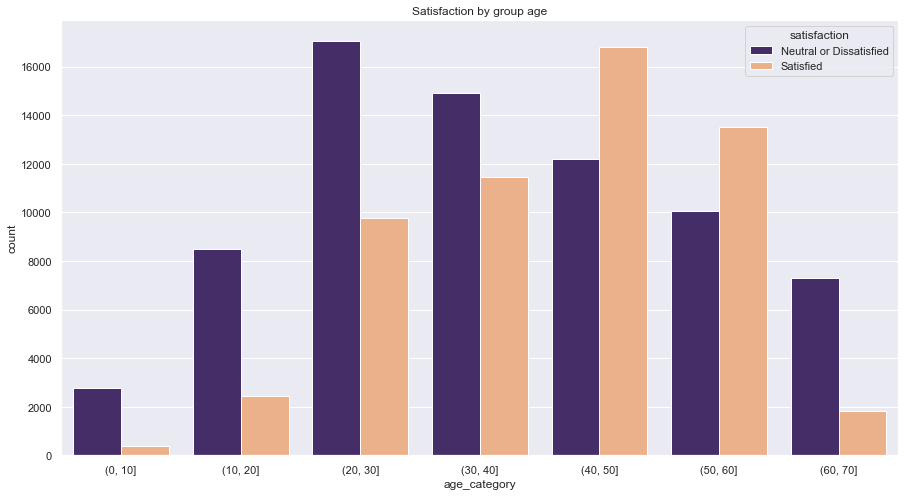

In [109]:
fig = plt.figure(figsize = (15,8))
sns.set_theme(style="darkgrid")
sns.countplot(data=df,x=df.age_category,hue=df.satisfaction ,palette=['#432371',"#FAAE7B"])
plt.title('Satisfaction by group age')
plt.show()

### Satisfaction by Customer Type 

#### Satisfaction for each features by Type

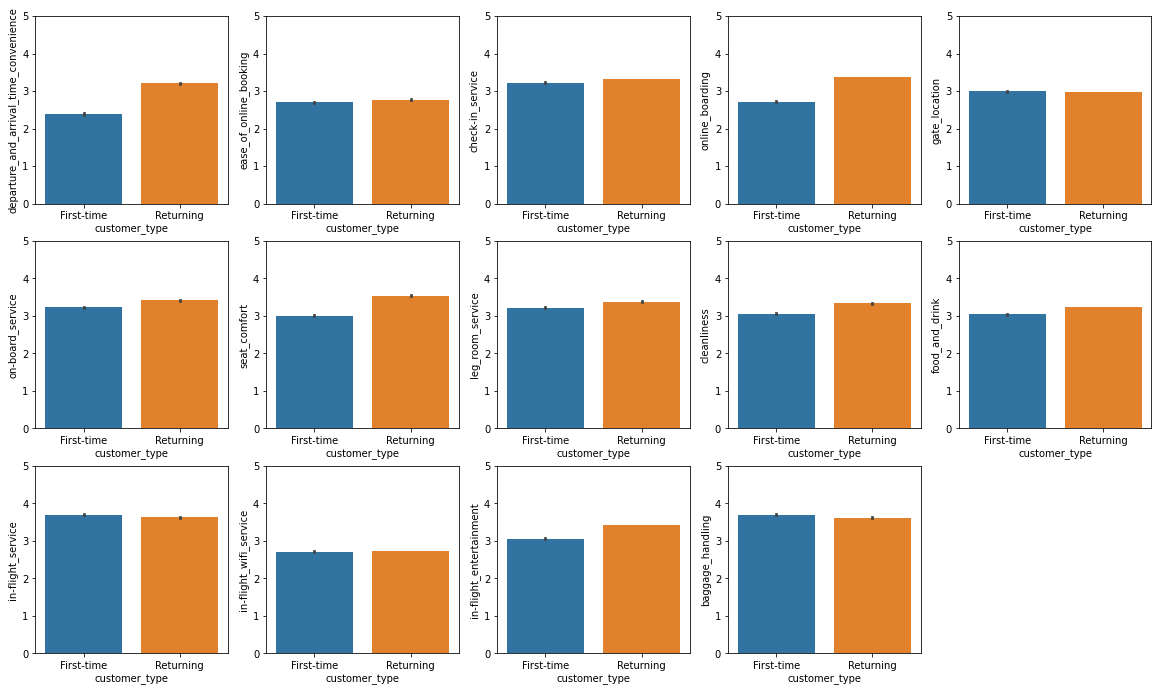

In [21]:
fig = plt.figure(figsize = (20,20))
i=1
for feature in features: 
    plt.subplot(5,5,i)
    plt.ylim(0,5)
    ax = sns.barplot(data = df , x = df.customer_type , y =df[feature])
    i +=1

#### Global satisfaction by Type

### Satisfaction by Type Of Travel 

#### Satisfaction for each features by Type of Travel

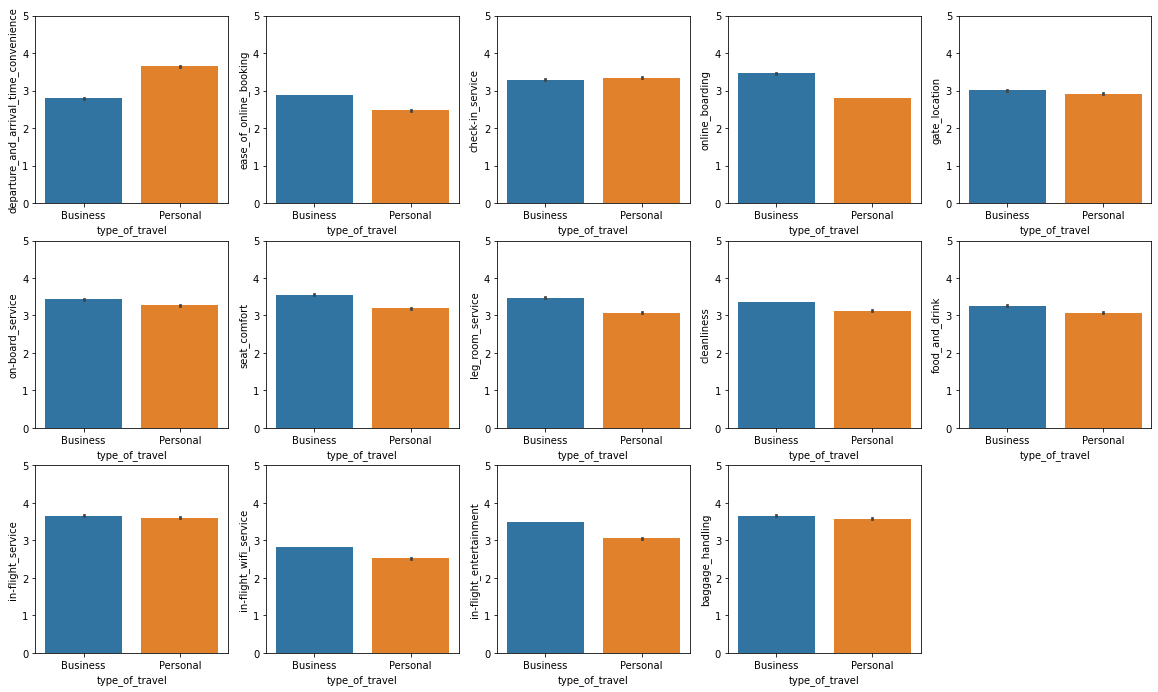

In [22]:
fig = plt.figure(figsize = (20,20))
i=1
for feature in features: 
    plt.subplot(5,5,i)
    plt.ylim(0,5)
    ax = sns.barplot(data = df , x = df.type_of_travel , y =df[feature])
    i +=1

#### Global satisfaction by Type of Travel

### Satisfaction by Class 

#### Satisfaction for each features by Class

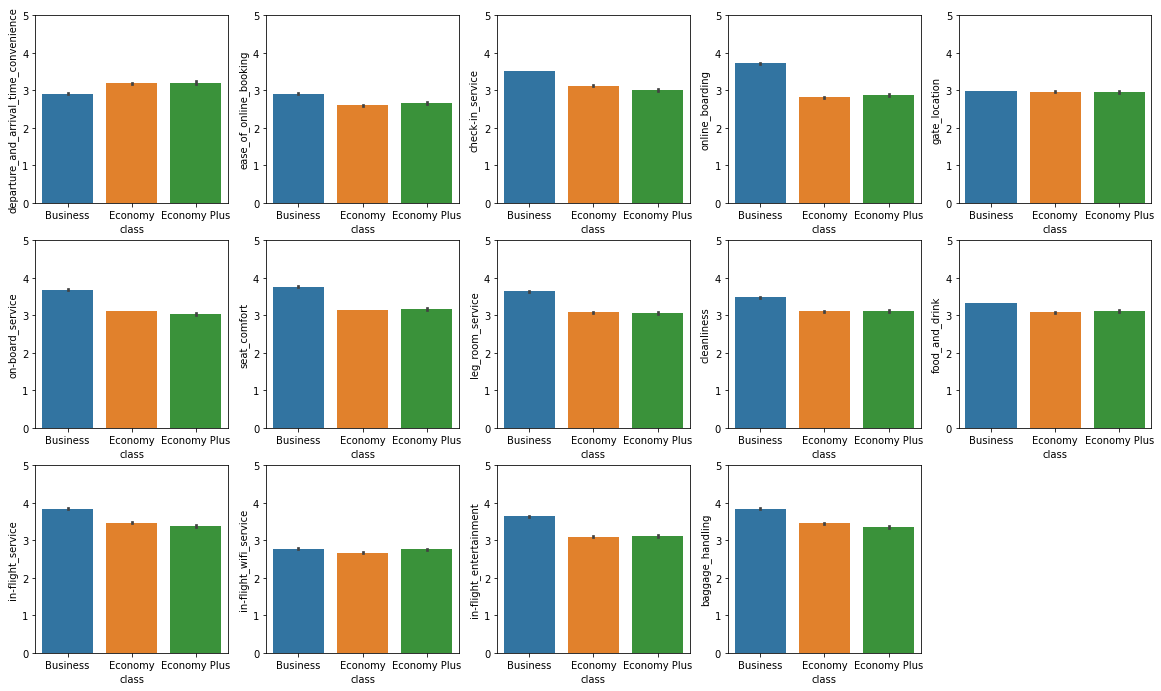

In [23]:
fig = plt.figure(figsize = (20,20))
i=1
for feature in features: 
    plt.subplot(5,5,i)
    plt.ylim(0,5)
    ax = sns.barplot(data = df , x = df['class'] , y =df[feature])
    i +=1

#### Global satisfaction by Class

### Satisfaction by Flight Distance

#### Satisfaction for each features by flight distance

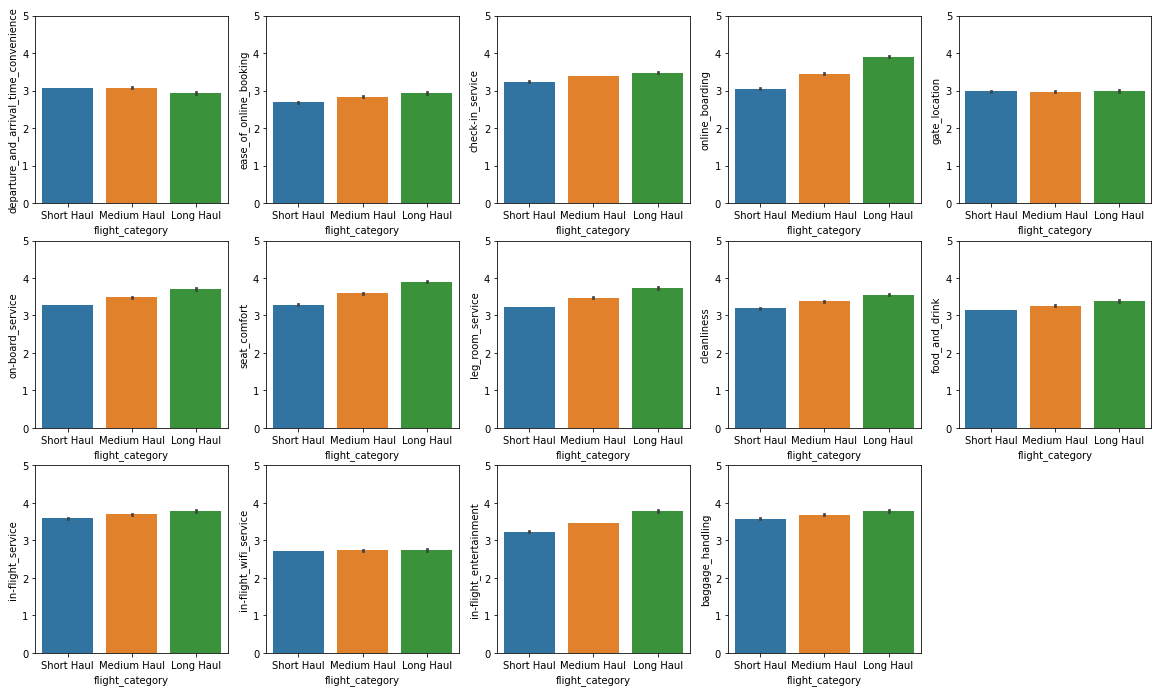

In [24]:
fig = plt.figure(figsize = (20,20))
i=1
for feature in features: 
    plt.subplot(5,5,i)
    plt.ylim(0,5)
    ax = sns.barplot(data = df , x = df.flight_category , y =df[feature])
    i +=1

#### Global satisfaction by Flight distance

### Global Satisfaction  